## Proyecto, Árboles de decisión.

### 1. Importación de librerías 

En las siguientes líneas de código se importan las librerías y herramientas necesarias para desarrollar el caso de uso.

In [1]:
# Librerías para manejo de datos
import pandas as pd
# Para preparar los datos
from sklearn.preprocessing import LabelEncoder
# Para crear el arbol de decisión 
from sklearn.tree import DecisionTreeClassifier 
# Para realizar la separación del conjunto de aprendizaje en entrenamiento y test.
from sklearn.model_selection import train_test_split
# Para evaluar el modelo
from sklearn.metrics import accuracy_score
# Para el reporte de rendimiento con métricas de clasificación 
from sklearn.metrics import confusion_matrix, classification_report, precision_score, recall_score, f1_score
from sklearn.metrics import plot_confusion_matrix
# Para búsqueda de hiperparámetros
from sklearn.model_selection import GridSearchCV
# Para la validación cruzada
from sklearn.model_selection import KFold 
#Librerías para la visualización
import matplotlib.pyplot as plt
from sklearn import tree

### 2. Carga de los datos
A través de la librería **pandas** podemos realizar la carga de datos desde diferentes fuentes de información, en este caso se realizará la carga de un archivo plano csv (archivo separado por comas).

In [2]:
# Se cargan los datos.
data=pd.read_csv('datos_proyecto_modulo4.csv', sep=';', na_values=['?'], encoding = 'latin-1')

In [3]:
# Cantidad de datos y número de variables
data.shape

(3276, 10)

In [4]:
# Mostrar los datos
data.head()

,pH,Dureza,Sólidos,Cloraminas,Sulfatos,Conductividad,Carbono_orgánico,Trihalometanos,Turbidez,Potabilidad
0,NaN,204.89,20791.32,7.30,368.52,564.31,10.38,86.99,2.96,NO
1,3.72,129.42,18630.06,6.64,NaN,592.89,15.18,56.33,4.50,NO
2,8.10,224.24,19909.54,9.28,NaN,418.61,16.87,66.42,3.06,NO
3,8.32,214.37,22018.42,8.06,356.89,363.27,18.44,100.34,4.63,NO
4,9.09,181.10,17978.99,6.55,310.14,398.41,11.56,32.00,4.08,NO


### 2. Limpieza y preparación de los datos

Primero vamos a ejecutar los pasos de limpieza de los datos, relacionados con la eliminación de registros con ausencias y duplicados.

In [5]:
# Es recomendable que todos los pasos de limpieza y preparación se realicen sobre otro archivo.
data_t = data
# Eliminación data vacía
data_t=data_t.dropna()
# Eliminación de registros duplicados.
data_t=data_t.drop_duplicates()

In [6]:
pd.value_counts(data_t['Potabilidad'])

NO    1200
SI     811
Name: Potabilidad, dtype: int64

Un aspecto muy importante para tener en cuenta son los requerimientos de entrada de los algoritmos de aprendizaje implementados en las librerías utilizadas. En particular, scikit-learn requiere que todos los atributos sean numéricos y que la variable objetivo esté codificada con números.

In [7]:
# Para hacer la transformación o codificación de la variable objetivo utilizaremos la función labelEncoder. Es importante 
# que tengas en cuenta que, aunque la representación de esta variable sea numérica, la tarea a resolver seguirá siendo 
# una clasificación.
# Primero tenemos que generar el objeto
codificacion = LabelEncoder()
# Ahora se ajusta a los datos
data_t['Potabilidad']=codificacion.fit_transform(data_t['Potabilidad'])

In [8]:
# Podemos ver cómo quedaron nuestro datos
data_t.head()

,pH,Dureza,Sólidos,Cloraminas,Sulfatos,Conductividad,Carbono_orgánico,Trihalometanos,Turbidez,Potabilidad
3,8.32,214.37,22018.42,8.06,356.89,363.27,18.44,100.34,4.63,0
4,9.09,181.10,17978.99,6.55,310.14,398.41,11.56,32.00,4.08,0
5,5.58,188.31,28748.69,7.54,326.68,280.47,8.40,54.92,2.56,0
6,10.22,248.07,28749.72,7.51,393.66,283.65,13.79,84.60,2.67,0
7,8.64,203.36,13672.09,4.56,303.31,474.61,12.36,62.80,4.40,0


In [9]:
#revisión del total de registros
data_t.shape

(2011, 10)

In [10]:
pd.value_counts(data_t['Potabilidad'])

0    1200
1     811
Name: Potabilidad, dtype: int64

### 3. Construcción del modelo

Los algoritmos supervisados implementados en scikit-learn requieren que las variables de entrada estén separadas de la variable objetivo. 

In [11]:
# Se selecciona la variable objetivo, en este caso "ECV".
Y=data_t['Potabilidad']
# Del conjunto de datos se elimina la variable "ECV".
X=data_t.drop(['Potabilidad'], axis=1)

In [12]:
# Dividir los datos en entrenamiento y test
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.2, random_state=0)

In [13]:
# Crear el objeto de arbol de decisión. Utilicemos como criterio de pureza la entropía.
arbol = DecisionTreeClassifier(criterion='entropy', random_state=0)

In [14]:
# Entrenar el modelo de arbol de decisión con los datos de entrenamiento
arbol = arbol.fit(X_train,Y_train)

Para determinar el rendimiento del modelo podemos en primer lugar, generar la matriz de confusión.

In [15]:
# Determinamos las predicciones del modelo sobre el conjunto test.
y_pred = arbol.predict(X_test)

In [16]:
# Se genera la matriz de confusión
confusion_matrix(Y_test, y_pred)

array([[164,  88],
       [ 72,  79]], dtype=int64)

C:\Users\Edwar\anaconda3\lib\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


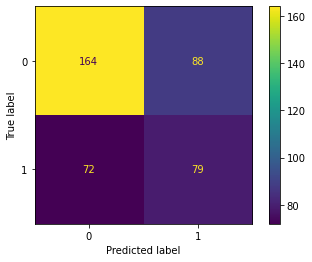

In [17]:
# Se puede visualizar la matriz de confusión
plot_confusion_matrix(arbol, X_test, Y_test)  
plt.show()  

También podemos generar diferentes métricas de rendimiento, como el recall, la precisión y la puntuación F1. 

In [18]:
print('Exactitud: %.2f' % accuracy_score(Y_test, y_pred))
print("Recall: {}".format(recall_score(Y_test,y_pred)))
print("Precisión: {}".format(precision_score(Y_test,y_pred)))
print("Puntuación F1: {}".format(f1_score(Y_test,y_pred)))

Exactitud: 0.60
Recall: 0.5231788079470199
Precisión: 0.47305389221556887
Puntuación F1: 0.4968553459119497


Para tener una panorama completo podemos generar un reporte.

In [19]:
# Mostrar reporte de clasificación
print(classification_report(Y_test, y_pred))

              precision    recall  f1-score   support

           0       0.69      0.65      0.67       252
           1       0.47      0.52      0.50       151

    accuracy                           0.60       403
   macro avg       0.58      0.59      0.58       403
weighted avg       0.61      0.60      0.61       403



Cuando se presentan desbalances en los datos (mas datos de una clase que de la otra), se aplica el parámetro "class_weight".

In [20]:
# Crear el objeto de arbol de decisión. Utilicemos como criterio de pureza la entropía.
arbol = DecisionTreeClassifier(criterion='entropy', class_weight='balanced', random_state=0)
arbol = arbol.fit(X_train,Y_train)
y_pred = arbol.predict(X_test)
print(classification_report(Y_test, y_pred))

              precision    recall  f1-score   support

           0       0.69      0.65      0.67       252
           1       0.47      0.52      0.49       151

    accuracy                           0.60       403
   macro avg       0.58      0.58      0.58       403
weighted avg       0.61      0.60      0.60       403



### 4. Construcción del modelos con búsqueda de hiperparámetros.
En el caso de los árboles de decisión los hiperparámetros principales que hay que ajustar están relacionados con aquellos que controlan la complejidad, pero también el criterio o medida de pureza puede afectar su rendimiento. En general, estos son:  

* **criterion** : {“gini”, “entropy”}, predeterminado = "gini".

La función para medir la calidad de una división. Los criterios admitidos son "gini" y "entropía".

* **max_depth:** int, predeterminado=None.

La profundidad máxima del árbol. Si es None, los nodos se expanden hasta que todas las hojas sean puras o hasta que todas las hojas contengan menos de min_samples_split muestras.

* **min_samples_split** : int or float, predeterminado=2.

El número mínimo de muestras necesarias para dividir un nodo interno

Para determinar los mejores valores de estos hiperparámetros vamos a realizar la búsqueda utilizando la función GridSearchCV.

In [30]:
# Fijemos el número de particiones. Utilizaremos K = 10.
particiones = KFold(n_splits=10, shuffle=True, random_state = 0)

In [31]:
# Establecemos el espacio de búsqueda para los hiperparámetros que deseamos ajustar. 
param_grid = {'criterion':['gini', 'entropy'],'max_depth':[4,6,8,10,12],'min_samples_split':[3, 4, 5]}

In [32]:
# Definimos el modelo sin ningún valor de estos hiperparámetros
arbol = DecisionTreeClassifier(class_weight='balanced', random_state=0)

In [33]:
# Ahora utilizamos GridSearch sobre el grid definido y con 10 particiones en la validación cruzada.
mejor_modelo = GridSearchCV(arbol, param_grid, cv=particiones)
# Ajuste del modelo
mejor_modelo.fit(X_train, Y_train)

GridSearchCV(cv=KFold(n_splits=10, random_state=0, shuffle=True),
             estimator=DecisionTreeClassifier(class_weight='balanced',
                                              random_state=0),
             param_grid={'criterion': ['gini', 'entropy'],
                         'max_depth': [4, 6, 8, 10, 12],
                         'min_samples_split': [3, 4, 5]})

In [34]:
# Podemos ver cual fue el resultado de la búsqueda (mejores valores de hiperparámetros)
mejor_modelo.best_params_

{'criterion': 'gini', 'max_depth': 10, 'min_samples_split': 4}

In [35]:
# Obtener el mejor modelo.
modelo_final = mejor_modelo.best_estimator_
# Probemos ahora este modelo sobre test.
y_pred = modelo_final.predict(X_test)
print(classification_report(Y_test, y_pred))

              precision    recall  f1-score   support

           0       0.71      0.58      0.64       252
           1       0.46      0.61      0.53       151

    accuracy                           0.59       403
   macro avg       0.59      0.59      0.58       403
weighted avg       0.62      0.59      0.60       403



### 5. Predicciones y probabilidad

Una vez obtenido el modelo de árbol de decisión también podríamos obtener la probabilidad de que un dato sea clasificado como de una clase particular. 

In [36]:
# Por ejemplo, tomemos un dato del conjunto de test y apliquemos el método "predict_proba".
y_pred_test = modelo_final.predict_proba(X_test.iloc[[20]])

In [37]:
print(y_pred_test)

[[1. 0.]]


In [38]:
# Para saber el orden de las clases puedes utilizar el atributo "classes_" del modelo:
modelo_final.classes_

array([0, 1])

### 6. Interpretación del modelo.
Podemos determinar cuáles atributos son los más importantes a partir del modelo generado. Recuerda que estos algoritmos realizan una selección en cada paso de construcción del árbol con base en la medida de pureza.

In [39]:
# Obtener la importancia de las variables. Para esto podemos utilizar uno de los atributos del modelo "feature_importances_", el
# cual nos devuelve un coeficiente o peso para cada atributo: mientras más grande sea este más importante será la variable
# asociada.
importancia= modelo_final.feature_importances_
importancia

array([0.21569214, 0.12172624, 0.12243164, 0.14660628, 0.18739184,
       0.04162741, 0.06006065, 0.03335173, 0.07111207])

In [40]:
importancia_atributo = pd.DataFrame(data={"Atributo": X_train.columns,"Importancia": importancia})
importancia_atributo = importancia_atributo.sort_values(by='Importancia', ascending=False).reset_index(drop=True)
importancia_atributo

,Atributo,Importancia
0,pH,0.215692
1,Sulfatos,0.187392
2,Cloraminas,0.146606
3,Sólidos,0.122432
4,Dureza,0.121726
5,Turbidez,0.071112
6,Carbono_orgánico,0.060061
7,Conductividad,0.041627
8,Trihalometanos,0.033352
